In [1]:
### import necessary packages ###
import matplotlib.pylab as plt  ##plotting 
from rawice import *            ##all modules from rawice.py
import warnings
import numpy as np
import os

warnings.filterwarnings('ignore')

__Note:__ saving the raw acq data will require that you adjust the locations based on where it is on your laptop. This is how I got it through sciserver, but going straight from the weathertop laptop allows you to define the folder path and path normally.

In [2]:
## location of raw acq data
notebook_path = os.path.abspath("6.13.22 ICE Board Clock analysis.ipyn")
folder_path = os.path.join(os.path.dirname(notebook_path), "6.13.Run/")
path = os.path.join(os.path.dirname(notebook_path), "6.13.Run/000017")
## File 000006 is bad for some reason

## load data from file to object 'acq'
acq = raw_acq(path)
#help(raw_acq)
acq.adc_input

#set the input 
tm4_input = [0,0,12]
tm5101_input = [0,0,3]

Loaded raw acq HDF5 file ... 


# TM-4 Data 

Checking input [0, 0, 12] ... 


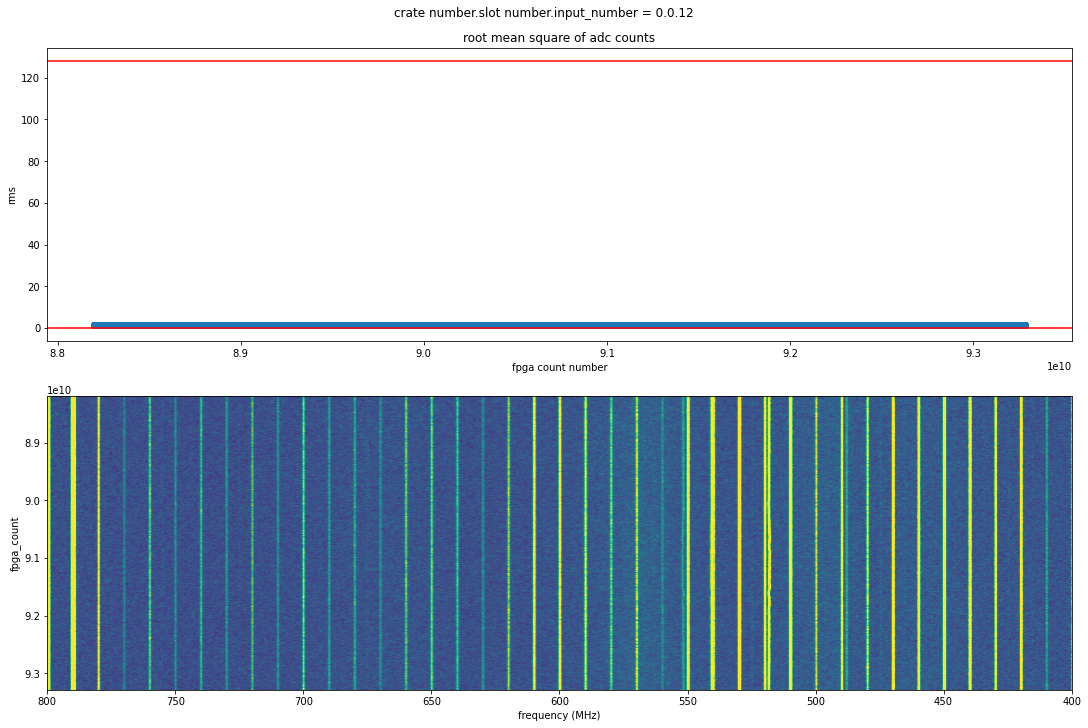

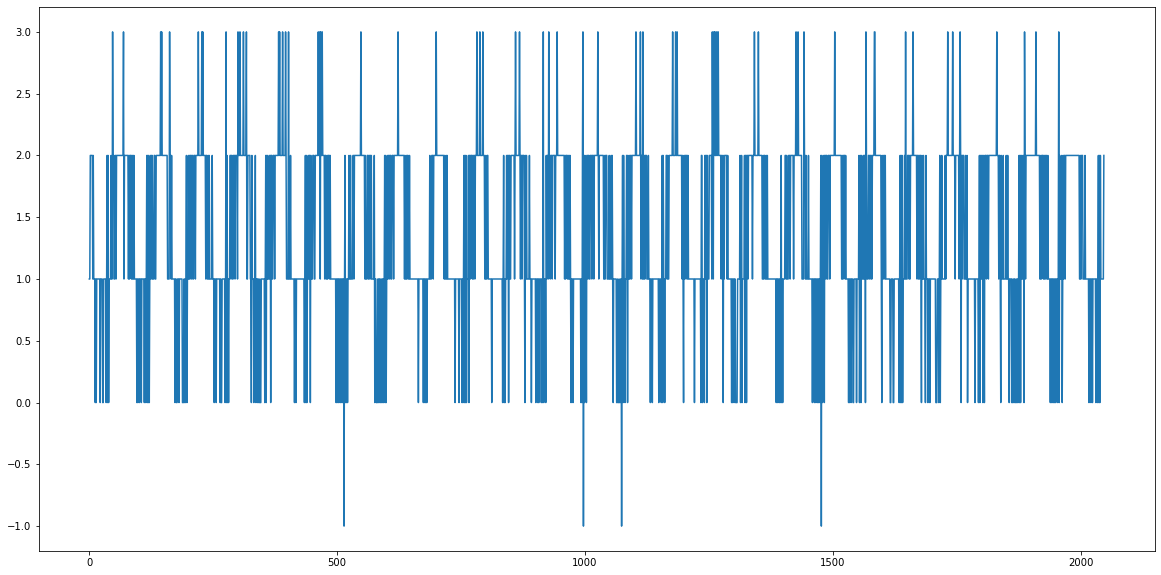

In [3]:
tm4 = acq.check_input(tm4_input)
tm4.inspect_maser()
tm4.plot_single_input_diagnostics()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm4.time_streams[0])

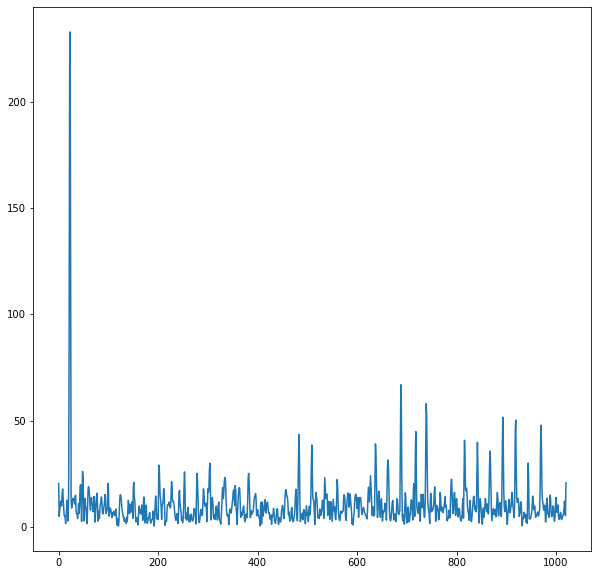

In [4]:
plt.figure(figsize=(10,10))
plt.plot(tm4.mag_fft[0][3:])
maxval = max(tm4.mag_fft[0][3:])

(231.84055686493366-22.56951470193016j)
26


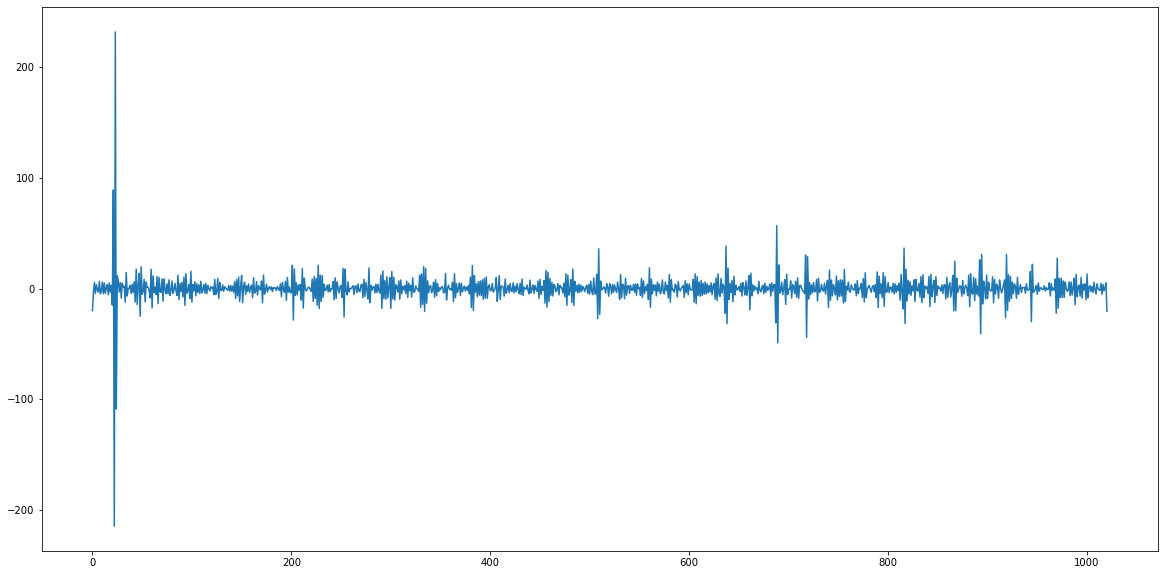

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(tm4.fft[0][3:])

print(max(tm4.fft[0][3:]))
print(np.ndarray.argmax(tm4.fft[0][3:])+3)

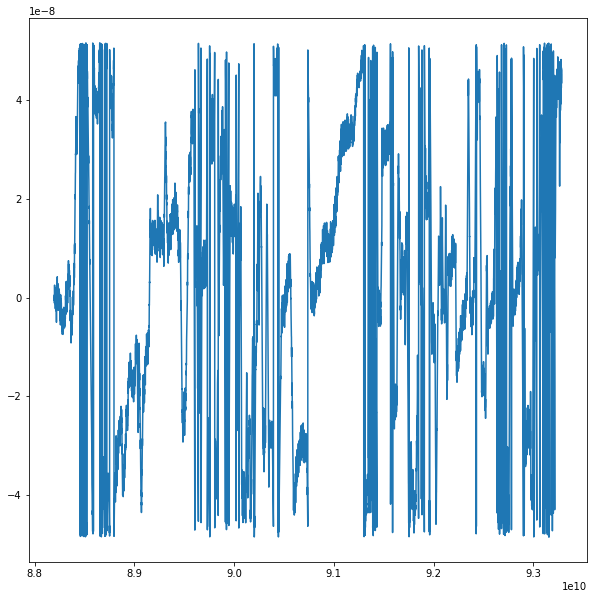

In [6]:
plt.figure(figsize=(10,10))
plt.plot(tm4.time_fpga_count, tm4.tau)

[-0.09704351 -0.1336273  -0.06105496 ...  2.74287325  2.627812
  2.81629675]


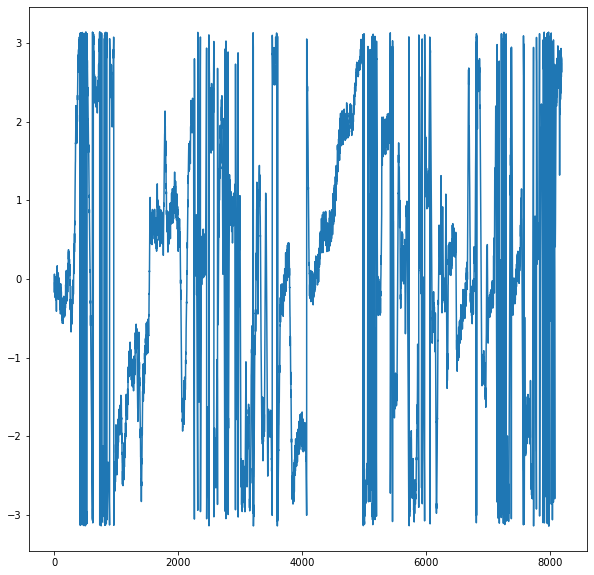

In [7]:
tm4_angle_pre = tm4.angle_fft[:, 26]
print(tm4_angle_pre)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(tm4_angle_pre[3:])


8192
[-0.09704351 -0.1336273  -0.06105496 ...  2.74287325  2.627812
  2.81629675]
[-0.09704351 -0.1336273  -0.06105496 ...  9.02605856  8.9109973
  9.09948205]


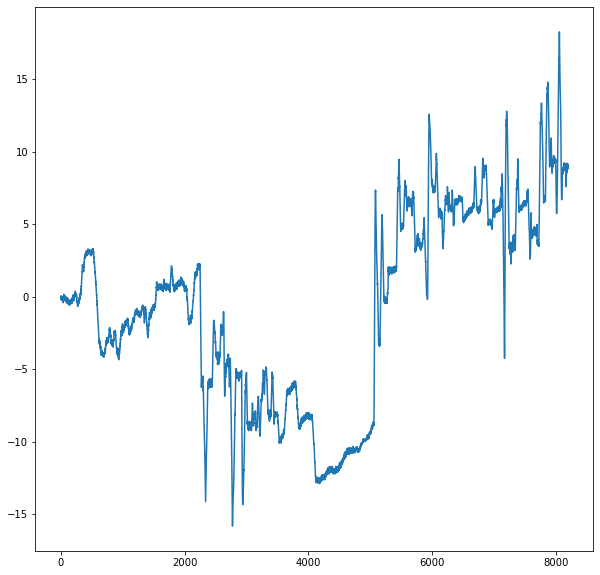

In [8]:
tm4_angle_unwrap = np.unwrap(tm4_angle_pre)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(tm4_angle_unwrap)
print(len(tm4_angle_unwrap))
print(tm4_angle_pre)
print(tm4_angle_unwrap)

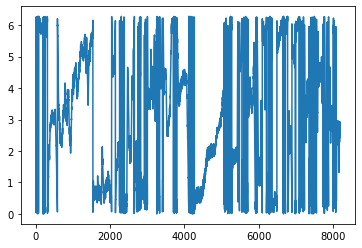

In [9]:
tm4_angle_fix = tm4_angle_pre % (2*np.pi)

fig, ax = plt.subplots()
plt.plot(tm4_angle_fix)

Text(0.5, 1.0, 'TM4 tau')

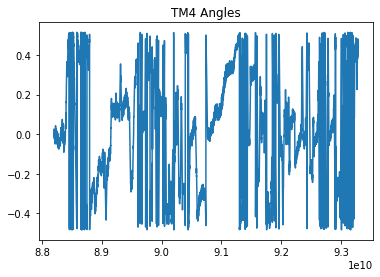

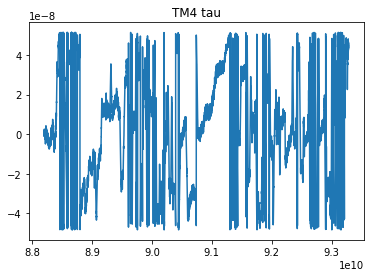

In [10]:
tm4angle = tm4.angle_fft[:, 26]/(2 * np.pi)
tm4angle = tm4angle - tm4angle[0]
tm4tau = tm4angle / 10e6

fig, ax1 = plt.subplots()
ax1.plot(tm4.time_fpga_count, tm4angle)
ax1.set_title('TM4 Angles')

fig, ax2 = plt.subplots()
ax2.plot(tm4.time_fpga_count, tm4tau)
ax2.set_title('TM4 tau')

In [11]:
tm4_clock = analyse_maser(folder_path, tm4_input)

Loaded raw acq HDF5 file ... 
Checking input [0, 0, 12] ... 
Checking input [0, 0, 12] ... ##############......................................................] 6/18
Checking input [0, 0, 12] ... ###################.................................................] 7/18
Loaded raw acq HDF5 file ... ########################.............................................] 8/18
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #############################........................................] 9/18
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #################################....................................] 10/18
Checking input [0, 0, 12] ... 
Loaded raw acq HDF5 file ... #####################################................................] 11/18
Checking input [0, 0, 12] ... 
Checking input [0, 0, 12] ... #########################################...........................] 12/18
Checking input [0, 0, 12] ... #############################################..

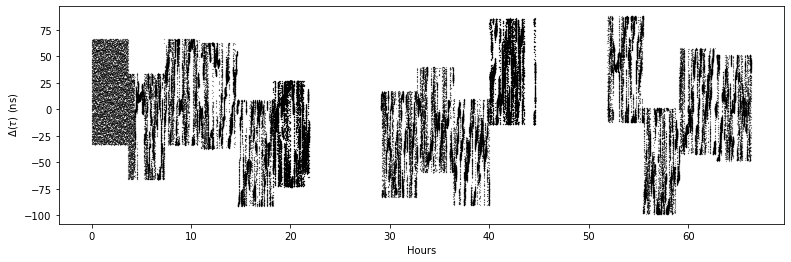

In [12]:
tm4_delays = tm4_clock.plot_delays()

In [ ]:
tm4_clock.get_allan_deviation()

In [ ]:
tm4_clock.delays

tm4_phase = 2 * np.pi * 10e6 * tm4_clock.delays
tm4_phase_corrected = tm4_phase % (2. * np.pi)

tm4_clock_delays = tm4_phase_corrected / (2 * np.pi * 10e6)
print(tm4_clock_delays)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(tm4_clock.fpgatime*2.56e-6/60/60, tm4_clock_delays/10e-9, ',')

# TM5101 Data

In [ ]:
tm5101 = acq.check_input(tm5101_input)
tm5101.inspect_maser()
tm5101.plot_single_input_diagnostics()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm5101.time_streams[1])

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tm5101.mag_fft[0][3:])
print(max(tm5101.mag_fft[0][3:]))
print(np.ndarray.argmax(tm5101.mag_fft[0][3:])+3)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(tm5101.fft[0][3:])

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(tm5101.time_fpga_count, tm5101.tau)

In [ ]:
tm5101_angle_pre = tm5101.angle_fft[:, 26]

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(tm5101_angle_pre[3:])

In [ ]:
tm5101_angle_unwrap = np.unwrap(tm5101_angle_pre)

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(tm5101_angle_unwrap)

In [ ]:
tm5101angle = tm5101.angle_fft[:, 26]/(2 * np.pi)
tm5101angle = tm5101angle - tm5101angle[0]
tm5101tau = tm5101angle / 10e6

fig, ax1 = plt.subplots()
ax1.plot(tm5101.time_fpga_count, tm5101angle)
ax1.set_title('TM5101 Angles')

fig, ax2 = plt.subplots()
ax2.plot(tm5101.time_fpga_count, tm5101tau)
ax2.set_title('TM5101 tau')

In [23]:
tm5101_clock = analyse_maser(folder_path, tm5101_input)

Loaded raw acq HDF5 file ... 
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... .....................................................................] 2/18
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ##...................................................................] 3/18
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ######...............................................................] 4/18
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ###########..........................................................] 5/18
Checking input [0, 0, 3] ... 
Checking input [0, 0, 3] ... ###############......................................................] 6/18
Checking input [0, 0, 3] ... ####################.................................................] 7/18
Loaded raw acq HDF5 file ... ########################.............................................] 8/18
Checking input [0, 0, 3] ... 
Loaded raw acq HDF5 file ... ##########################

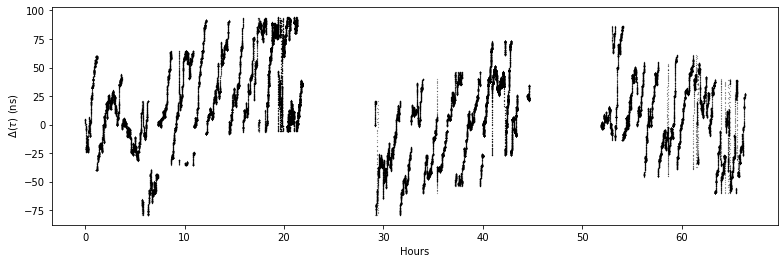

In [24]:
tm5101_delays = tm5101_clock.plot_delays()

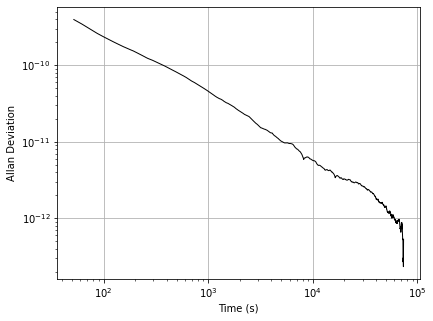

In [25]:
tm5101_clock.get_allan_deviation()

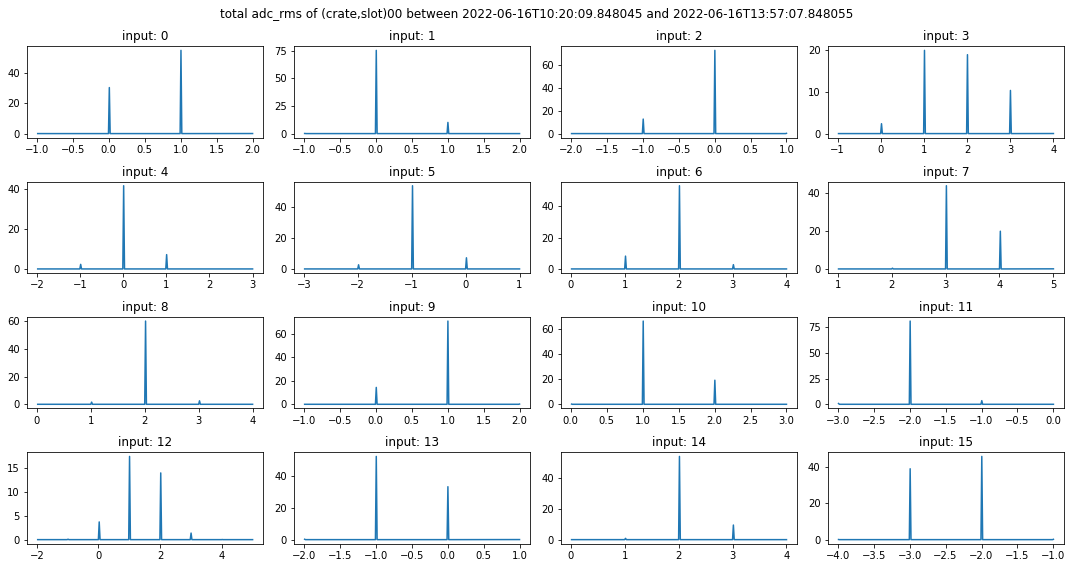

In [26]:
acq.check_iceboard(0, 0)

raw ACQ diagnostics ... 

archive_version: 2.4.0
collection_server: hostname
git_version_tag: 0.1
file_name: /home/wvurail/acq/20220613T203652Z_GBOs434/raw_acq/000017
data_type: ADC snapshot data
system_user: root
rawadc_version: 0.1

ctime Timestamp of first raw_adc frame: 2022-06-16T10:20:09.848045
ctime Timestamp of last raw_adc frame: 2022-06-16T13:57:07.848055

Time between raw_adc captures is either [1. 2. 3.] seconds


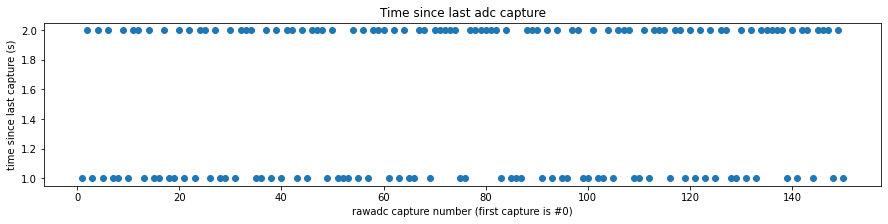

In [27]:
acq.diagostics()

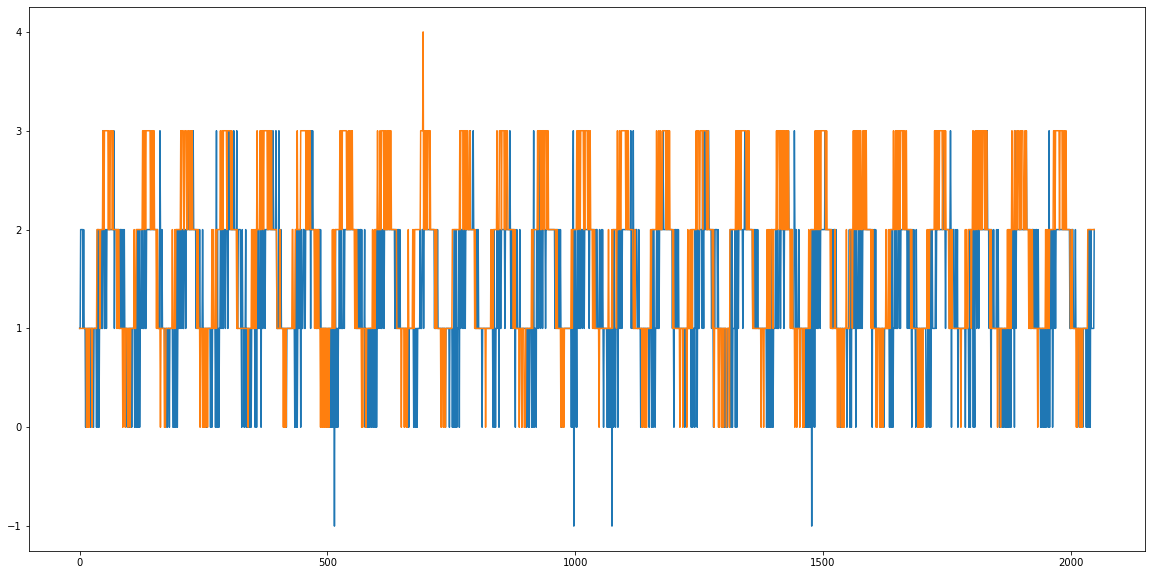

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(tm4.time_streams[0])
plt.plot(tm5101.time_streams[0])